This is the setup for a standard MRF with inference

Things to discuss:

1. Type of factor: Discrete vs. Continuous 
2. Type of inference: Variable Elimination vs. Belief Propogation
3. How to calculate phi using co-occurrences?

In [30]:
import numpy as np
import pandas as pd
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import VariableElimination, BeliefPropagation
import daft
import random
import itertools

In [21]:
objects = ["floor","microwave","trash","towel"]
cooccur = np.array([[1,0.01,0.7,0.25],
                    [0.01,1,0.5,0.25],
                    [0.7,0.5,1,0.1],
                    [0.25,0.25,0.1,1]])

cooccur = pd.DataFrame(cooccur,index=objects,columns=objects)
print(cooccur)

           floor  microwave  trash  towel
floor       1.00       0.01    0.7   0.25
microwave   0.01       1.00    0.5   0.25
trash       0.70       0.50    1.0   0.10
towel       0.25       0.25    0.1   1.00


In [36]:
# instantiate network
G = MarkovNetwork()

# create graph (add nodes and edges)
nodes = objects
edges = list(itertools.combinations(objects,r=2))

G.add_nodes_from(nodes)
G.add_edges_from(edges)

<Axes:>

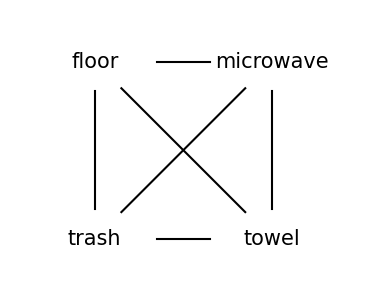

In [46]:
# illustrate graph
pgm = daft.PGM(aspect=2.1, dpi=150, node_unit=1, grid_unit=3, directed=False, node_ec=None)

x = [0, 1, 0, 1]
y = [1, 1, 0, 0]

for i in range(len(nodes)):
    pgm.add_node(nodes[i], nodes[i], x[i], y[i])
    
for i in range(len(edges)):    
    pgm.add_edge(edges[i][0],edges[i][1])
    
pgm.render()

In [71]:
# create factors
for edge in G.edges():
    phi = cooccur.loc[edge[0],edge[1]]
    factor = DiscreteFactor(edge, [2, 2], np.random.rand(4))
    G.add_factors(factor)

In [62]:
# inference
G_infer = BeliefPropagation(G)
G_prob = G_infer.query(variables=['trash'], evidence={'floor': 1, 'microwave': 1, 'towel': 0})
print(G_prob)

0it [00:00, ?it/s]

+----------+--------------+
| trash    |   phi(trash) |
+==========+==============+
| trash(0) |       0.8981 |
+----------+--------------+
| trash(1) |       0.1019 |
+----------+--------------+
